# Lab 1.2: Node Embedding, Node Classification, and Link Prediction

**Objectives:** 
- Implement different traditional and embedding-based graph representation learning methods
- Compare and analyse the performances of the methods for embedding learning, node classification and link prediction tasks. 

**Completion requirements:**

By the end of this notebook, you should have:
- Implemented all code cells for:
  - the representation learning methods. 
  - training the methods.
  - assesing the performance of the methods.
- Answered the analysis questions on each section. 

## Libraries

<!-- 
# If you have not installed pytorch geometric uncomment the following lines to install it

# !pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# !pip install wntr -->

To run this notebook you need to have installed the following packages:

- TDC
- Numpy
- Pytorch
- NetworkX
- Matplotlib
- Scikit-learn
- Pytorch geometric  

Run the following code to import the packages

In [1]:

# %pip install PyTDC
# %pip install numpy
# %pip install torch
# %pip install networkx
# %pip install sklearn
# %pip install torch-geometric
# !pip list

%conda install -c conda-forge pytorch -y
%conda install -c conda-forge networkx -y
%conda install -c conda-forge scikit-learn -y
%conda install -c conda-forge numpy -y
%conda install -c conda-forge PyTDC -y
%conda install -c conda-forge torch-geometric -y
%conda install pyg -c pyg -y

Channels:
 - conda-forge
 - defaults
 - pyg
Platform: osx-64
Solving environment: done

## Package Plan ##

  environment location: /Users/anja/miniconda3

  added / updated specs:
    - pytorch


The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            pkgs/main/osx-64::certifi-2024.2.2-py~ --> conda-forge/noarch::certifi-2024.2.2-pyhd8ed1ab_0 
  conda              pkgs/main::conda-24.4.0-py310hecd8cb5~ --> conda-forge::conda-24.4.0-py310h2ec42d9_0 




Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.
Channels:
 - conda-forge
 - defaults
 - pyg
Platform: osx-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
Channels:
 - conda-forge
 - defaults
 - pyg
Platform: osx-64
Solving environment: done

# All requested packages already installed.


Note: you may need 

In [2]:
%conda install pytorch-cluster -c pyg

Channels:
 - pyg
 - defaults
 - conda-forge
Platform: osx-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [1]:
# import the libraries
import torch
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# import the functions
from numpy import dot
import torch.nn as nn
from sklearn import metrics
from numpy.linalg import norm
import torch.nn.functional as F
from sklearn.metrics import roc_auc_score
from torch_geometric.utils import mask as Mask
from torch_geometric.utils import to_networkx
from torch_geometric.nn.models import Node2Vec
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split

# import the datasets
# from torch_geometric.datasets import Planetoid

In [4]:
%conda list

# packages in environment at /Users/anja/miniconda3:
#
# Name                    Version                   Build  Channel
aiohttp                   3.9.5           py310h6c40b1e_0  
aiosignal                 1.3.1                    pypi_0    pypi
appnope                   0.1.2           py310hecd8cb5_1001  
archspec                  0.2.3              pyhd3eb1b0_0  
asttokens                 2.0.5              pyhd3eb1b0_0  
async-timeout             4.0.3           py310hecd8cb5_0  
attrs                     23.2.0                   pypi_0    pypi
boltons                   23.0.0          py310hecd8cb5_0  
brotli                    1.1.0                h0dc2134_1    conda-forge
brotli-bin                1.1.0                h0dc2134_1    conda-forge
bzip2                     1.0.8                h6c40b1e_5  
c-ares                    1.19.1               h6c40b1e_0  
ca-certificates           2024.3.11            hecd8cb5_0  
cairo                     1.16.0               h3ce6f7e_5

In [2]:
# import the datasets
from torch_geometric.datasets import Planetoid

---

## Lab 1.2.1: Generate and visualize the node embeddings

### Decription of the dataset:    
The Cora dataset consists of 2708 scientific publications classified into one of seven classes. The citation network consists of 5429 links. Each publication in the dataset is described by a 0/1-valued word vector indicating the absence/presence of the corresponding word from the dictionary. The dictionary consists of 1433 unique words. More infos about Cora dataset can be found here: https://paperswithcode.com/dataset/cora.

Run the following code to load the cora dataset:

In [3]:
cora_dataset = Planetoid(root="", name="Cora", split="public")
data = cora_dataset[0]

Run the following code to check the characteristics of the dataset:

In [4]:
# number of nodes, dimensions of features, number of edges
print(data.x.shape[0])
print(data.x[0])
print(data.x.shape[1])
print(data.edge_index.shape[1])
# print(data.y)

2708
tensor([0., 0., 0.,  ..., 0., 0., 0.])
1433
10556


### 🕵 <font color='289C4E'>Question<font><a class='anchor' id='top'></a>

  **(a) Generate hand crafted features** by concatenating the
  
      - 1. Degree centrality 
      - 2. clustering coefficient 
      - 3. betweenness centrality 
      
     as feature vector for each node and visulaize it using TSNE.

The graph is directed.
0.0022164758034724785 0.3333333333333333 9.76615354875872e-07
0.0022164758034724785 0 0.001080476705520546
0.003694126339120798 0 0.0040508162724597506
0.0007388252678241596 0 0.0
0.003694126339120798 0.7 0.00055117615382112
0.0022164758034724785 0.3333333333333333 7.501561061887951e-06
0.0029553010712966383 0.3333333333333333 0.0006987223189870186
0.0007388252678241596 0 0.0
0.0022164758034724785 0 0.0026983944411181357
0.0014776505356483192 1.0 0.0
0.0014776505356483192 0 0.0006779390761298553
0.0014776505356483192 1.0 0.0
0.0029553010712966383 0.5 5.460644995004875e-07
0.0014776505356483192 0 0.0008479377334516646
0.003694126339120798 0.3 0.0008971827115009842
0.0029553010712966383 1.0 0.0
0.0029553010712966383 0 2.477326635979589e-05
0.003694126339120798 0.2 0.0008845896023690468
0.003694126339120798 0 0.0002375253612377142
0.0007388252678241596 0 0.0
0.003694126339120798 0.2 0.008091618406043576
0.0014776505356483192 0 0.00012647571091374646
0.00369412633912

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


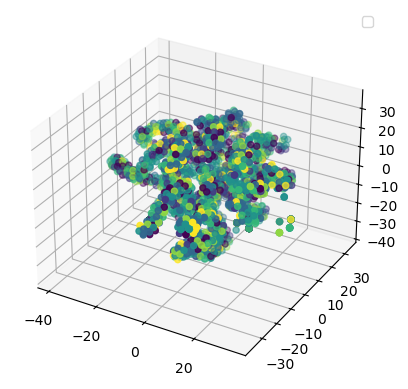

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


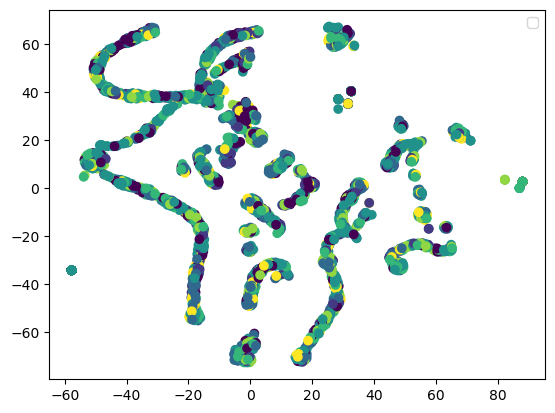

In [5]:
import networkx as nx
# The package networkx has the corresponding function

# Generate hand crafted feature concatenating the degree centrality, clustering coefficient, and betweeness centreality as a feature vector for each node and visualize using TSNE

######################################################################### 
# write code here to convert the pytorch graph to networkx graph

# Convert pytorch graph to networkx graph
G = to_networkx(data)
# Assuming you have a graph stored in the variable G
is_directed = nx.is_directed(G)

if is_directed:
    print("The graph is directed.")
else:
    print("The graph is not directed.")



# call the corresponding functions to calculate the hand crafted features
degree_centrality = nx.degree_centrality(G)
clustering_coefficient = nx.clustering(G)
betweeness_centrality = nx.betweenness_centrality(G)


# Concatanate the features to be a feature vector
features = []
for i in range(data.x.shape[0]):
    print(degree_centrality[i], clustering_coefficient[i], betweeness_centrality[i])
    features.append([degree_centrality[i], clustering_coefficient[i], betweeness_centrality[i]])
features = np.array(features)

# save the feature vector such that it can be used in another jupyter notebook using the np.load("handcrafted_features.npy ")
np.save("handcrafted_features.npy", features)


######################################################################### 

######################################################################### 
#visualize features

# 3D plot with TSNE
tsne = TSNE(n_components=3, random_state=0)
X_embedded = tsne.fit_transform(features)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_embedded[:, 0], X_embedded[:, 1], X_embedded[:, 2], c=data.y)
ax.legend()
# ax.scatter(X_embedded[:, 0], X_embedded[:, 1], X_embedded[:, 2], )
plt.show()

# 2D plot with TSNE
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(features)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=data.y)
plt.legend()
plt.show()


######################################################################### 

### 🕵 <font color='289C4E'>Question<font><a class='anchor' id='top'></a>

**(b) Generate features vectors from Node2Vec using the following parameters. The output features should have three dimensions. Visulaize it using TSNE.**


    The size of each embedding vector.
    - embedding_dim=3
    
    The walk length
    - walk_length=20
    
    The actual context size which is considered for positive samples. 
    This parameter increases the effective sampling rate by reusing samples across different source nodes.
    - context_size=10
    
    The number of walks to sample for each node
    - walks_per_node=10
    
    The number of negative samples to use for each positive sample
    - num_negative_samples=1
    
    Likelihood of immediately revisiting a node in the walk
    - p=1
    
    Control parameter to interpolate between breadth-first strategy and depth-first strategy
    - q=1
    
    If set to :obj:`True`, gradients w.r.t. to the weight matrix will be sparse
    - sparse=False 
    
    batch size
    - batch_size=128
    
    shuffle the input data
    - shuffle=True
    
    number of epochs in training
    - train epochs=200
    
    learning rate in training
    - learning rate=0.01

In [23]:
# The Node2Vec model is imported above from torch_geometric.nn.models
from torch_geometric.nn.models import Node2Vec

######################################################################### 
# Define your Node2Vec model here
node2vec = Node2Vec(data.edge_index, embedding_dim=3, walk_length=20, context_size=10, walks_per_node=10, num_negative_samples=1, p=1, q=1, sparse=False)

# Define a loader here
loader = node2vec.loader(batch_size=128, shuffle=True)

# define an optimizer here
optimizer = torch.optim.Adam(node2vec.parameters(), lr=0.01)

######################################################################### 

######################################################################### 
#define the training function for the Node2Vec model here with 200 epochs
def train():
    node2vec.train()
    for epoch in range(200):
        for pos_rw, neg_rw in loader:
            optimizer.zero_grad()
            loss = node2vec.loss(pos_rw, neg_rw)
            loss.backward()
            optimizer.step()
        if epoch % 10 == 0:
            print(f"Epoch: {epoch}, Loss: {loss.item()}")
    return node2vec

#########################################################################  

######################################################################### 
#define the test function for the Node2Vec model here
def test():
    node2vec.eval()         # see potentially the test() function?
    out = node2vec()
    return out

#########################################################################

In [24]:
######################################################################### 
# train your Node2Vec model
node2vec = train()

#########################################################################

Epoch: 0, Loss: 1.6310899257659912
Epoch: 10, Loss: 1.0834344625473022
Epoch: 20, Loss: 1.0372380018234253
Epoch: 30, Loss: 1.00580632686615
Epoch: 40, Loss: 0.9711236953735352
Epoch: 50, Loss: 1.0108394622802734
Epoch: 60, Loss: 0.9936488270759583
Epoch: 70, Loss: 0.9938598275184631
Epoch: 80, Loss: 0.9844398498535156
Epoch: 90, Loss: 0.9742943048477173
Epoch: 100, Loss: 0.9822008609771729
Epoch: 110, Loss: 0.9771958589553833
Epoch: 120, Loss: 0.9950649738311768
Epoch: 130, Loss: 0.9857711791992188
Epoch: 140, Loss: 0.9927003383636475
Epoch: 150, Loss: 0.9754658937454224
Epoch: 160, Loss: 0.9944667816162109
Epoch: 170, Loss: 0.9973109364509583
Epoch: 180, Loss: 0.9698214530944824
Epoch: 190, Loss: 0.9669952988624573


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


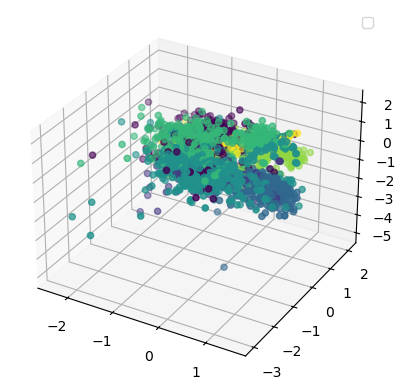

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


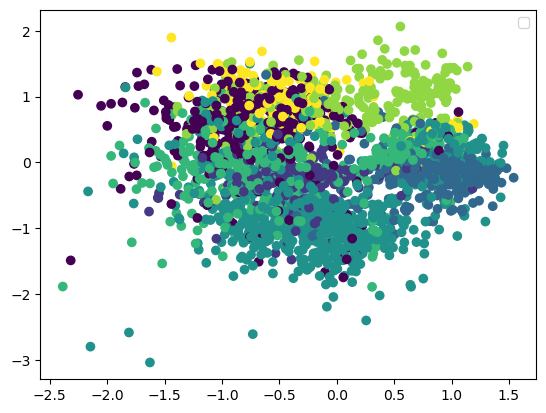

In [25]:
######################################################################### 
# produce embedding using the trained model
embedding = node2vec.forward()

# print(embedding.detach().numpy())
embedding = embedding.detach().numpy()

# save the embedding such that it can be used in another jupyter notebook using the np.load("embedding.npy ")
np.save("embedding.npy", embedding)

# visualize the embedding using TSNE in 3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=data.y)
ax.legend()
plt.show()

# visualize the embedding using TSNE in 2D
plt.scatter(embedding[:, 0], embedding[:, 1], c=data.y)
plt.legend()
plt.show()


######################################################################### 

### 🕵 <font color='289C4E'>Question<font><a class='anchor' id='top'></a>

**(c)Compare the features generated from above. From the visualization, which feature vector is more informative? And give the reasons in the following cell:**

**Answer here:** 

The Node2Vec feature vector is more informative.

The Node2Vec feature vector is able to intrinsically capture the graph topology information by going on a random walk through the graph.

The graph is directed and the Node2vec feature embeddings are directionally agnostic which further explain why it works on this graph type.

The Node2Vec algorithm is based on optimizing a metric thus it more intelligently learns the embeddings.

Concatenation of the features together is a naive approach and does not fully utilize the information of how nodes connect to eachother. It clearly underperforms compared to Node2Vec as seen in the plots where data of different classes are embedded closely together in the space where they should, in fact, be further apart.





---